In [3]:
import numpy as np #manejo de arreglos algebra lineal
import pandas as pd #manejo dataframes tipo datos
import matplotlib.pyplot as plt #graficas
import seaborn as sns #graficas estadísticas
import random

In [5]:
#si no corren esta no funciona la celda de abajo
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQs7acVB35L3qigzmd3kFpA77hxVqdQq-s2qK-h3AMahFlmskTTpvNcjBx8WxzTb2etvA1gsofgoW8w/pub?output=csv"
x_ = pd.read_csv(url)
x_ = x_.values

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42) #se crea un objeto kmeans con las propiedades del algoritmo
clusters = kmeans.fit_predict(x_) # Asingando los datos y otorgandoles etiquetas (4, por número de clusters)
##Investigar método del codo

In [8]:
from sklearn.decomposition import PCA
#Crear un objeto PCA (Principal Component Analysis) y ajustar los datos
pca = PCA(n_components=3) #Queremos las tres primeras componentes principales
x_pca = pca.fit_transform(x_)

In [9]:
from scipy.spatial import distance

cov = np.cov(x_.T)
cov_inv = np.linalg.inv(cov)

### Definiremos la distancia de Mahalanobis
def distancia_mahalanobis(x, c):
  return distance.mahalanobis(x, c, cov_inv)

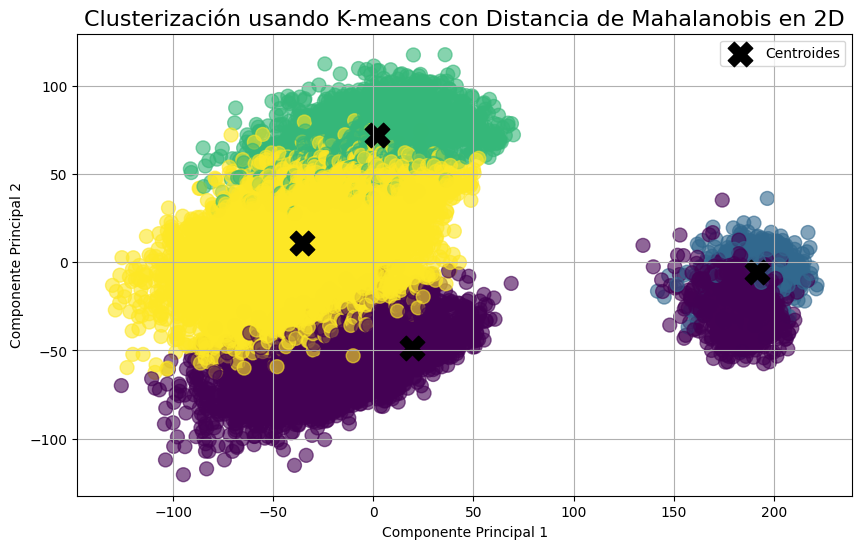

In [22]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.spatial import distance

# calcular la matriz de covarianza e inversa para Mahalanobis
cov = np.cov(x_.T)
cov_inv = np.linalg.inv(cov)

def distancia_mahalanobis(x, c):
    return distance.mahalanobis(x, c, cov_inv)

# inicialización de K-means
k = 4  # número de clusters
dimension = x_.shape[0]
centroids = x_[random.sample(range(dimension), k)]  # centroides iniciales
clusters_manuales = np.zeros(dimension)  # etiquetas de clusters
distancias = np.zeros((dimension, k))  # almacenamiento de distancias
tolerancia = 1e-6
error = 100

# algoritmo de K-means con distancia de Mahalanobis
while error > tolerancia:
    for i in range(dimension):  # para cada fila (dato)
        for j in range(k):  # para cada centroide
            distancias[i, j] = distancia_mahalanobis(x_[i], centroids[j])
        clusters_manuales[i] = np.argmin(distancias[i])

    centroids_prev = np.copy(centroids)  # guardar los centroides anteriores
    for l in range(k):  # para cada cluster
        puntos_cluster = x_[clusters_manuales == l]
        if len(puntos_cluster) > 0:
            centroids[l] = np.mean(puntos_cluster, axis=0)
        else:
            centroids[l] = x_[np.random.choice(dimension)]

    # calcular el error promedio en los centroides
    error = np.mean([distancia_mahalanobis(centroids[l], centroids_prev[l]) for l in range(k)])

# aplicar PCA para reducir los datos a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_)
centroids_pca = pca.transform(centroids)  #transformar los centroides a 2D

def graficar_clusters_2D(datos, clusters, centroides):
    plt.figure(figsize=(10, 6))
    # graficar los datos
    plt.scatter(datos[:, 0], datos[:, 1], c=clusters, cmap='viridis', alpha=0.6, s=100)
    # graficar los centroides
    plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=310, marker='X', label='Centroides')
    plt.title('Clusterización usando K-means con Distancia de Mahalanobis en 2D', fontsize=16)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend()
    plt.grid(True)
    plt.show()

graficar_clusters_2D(X_pca, clusters_manuales, centroids_pca)

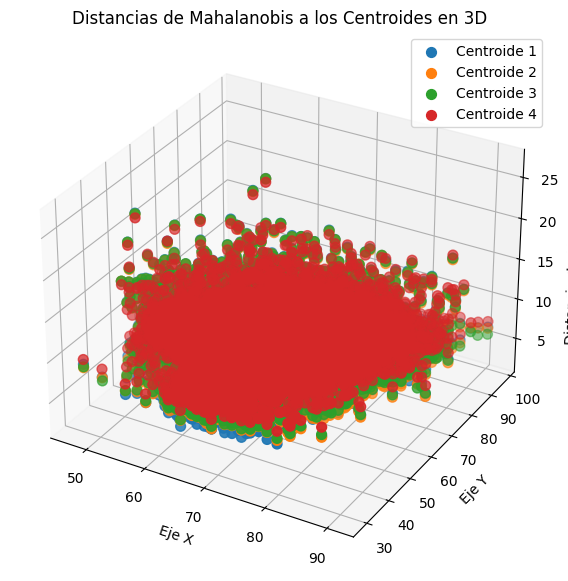

In [23]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.spatial import distance
from mpl_toolkits.mplot3d import Axes3D

# calcular la matriz de covarianza e inversa para Mahalanobis
cov = np.cov(x_.T)
cov_inv = np.linalg.inv(cov)

def distancia_mahalanobis(x, c):
    return distance.mahalanobis(x, c, cov_inv)

# inicialización de K-means
k = 4  # #de clusters
dimension = x_.shape[0]
centroids = x_[random.sample(range(dimension), k)]  # centroides iniciales
clusters_manuales = np.zeros(dimension)  # etiquetas de clusters
distancias = np.zeros((dimension, k))  # almacenamiento de distancias
tolerancia = 1e-6
error = 100

# algoritmo de K-means con distancia de Mahalanobis
while error > tolerancia:
    for i in range(dimension):  # para cada fila
        for j in range(k):  # para cada centroide
            distancias[i, j] = distancia_mahalanobis(x_[i], centroids[j])
        clusters_manuales[i] = np.argmin(distancias[i])

    centroids_prev = np.copy(centroids)  # guardar los centroides anteriores
    for l in range(k):  # para cada cluster
        puntos_cluster = x_[clusters_manuales == l]
        if len(puntos_cluster) > 0:
            centroids[l] = np.mean(puntos_cluster, axis=0)
        else:
            centroids[l] = x_[np.random.choice(dimension)]

# calcular el error promedio en los centroides
    error = np.mean([distancia_mahalanobis(centroids[l], centroids_prev[l]) for l in range(k)])

def graficar_distancias_mahalanobis_3D(datos, centroides):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    #recorrer cada centroide
    for i, centroide in enumerate(centroides):
  #calcular las distancias de Mahalanobis desde cada dato al centroide actual
        distancias = np.array([distancia_mahalanobis(x, centroide) for x in datos])
 #graficr los datos y sus distancias
        ax.scatter(datos[:, 0], datos[:, 1], distancias, label=f'Centroide {i+1}', s=50)
    ax.set_title('Distancias de Mahalanobis a los Centroides en 3D')
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Distancia de Mahalanobis')
    plt.legend()
    plt.show()

graficar_distancias_mahalanobis_3D(x_, centroids)